In [61]:
#Caleb Hull
#Homework 7
#10/9/2022

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
mnist = keras.datasets.fashion_mnist

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [21]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [22]:
np.max(X_train)

255

In [23]:
np.mean(X_train)

72.94035223214286

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

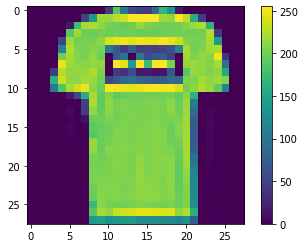

In [28]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [29]:
X_train = X_train/255.0

In [30]:
X_test = X_test/255.0

In [31]:
np.max(X_train)

1.0

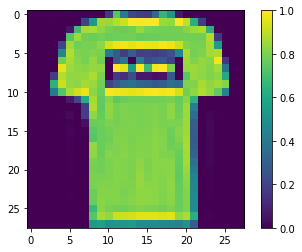

In [32]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [39]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [42]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4933 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3313 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3073 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2898 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2753 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2644 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2504 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.232

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8802
0.8802000284194946


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred = np.argmax(model.predict(X_test), axis= -1)

In [46]:
accuracy_score(y_test, y_pred)

0.8802

In [47]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
pred = model.predict(X_test)

In [49]:
pred

array([[9.0485137e-06, 1.8070297e-06, 2.1072431e-06, ..., 6.2960513e-02,
        2.7801445e-06, 9.3444258e-01],
       [1.5473559e-06, 1.6502496e-13, 9.9927026e-01, ..., 9.5438999e-18,
        1.4309535e-09, 1.2015189e-19],
       [9.1044789e-08, 9.9999976e-01, 1.2476871e-09, ..., 1.7417771e-20,
        5.3809266e-16, 1.0187339e-18],
       ...,
       [2.2606193e-06, 2.2338661e-12, 1.6712708e-08, ..., 1.2375348e-12,
        9.9999654e-01, 1.8397787e-13],
       [1.9216333e-07, 9.9999797e-01, 1.6749229e-09, ..., 1.2878357e-13,
        2.0774439e-11, 2.2924908e-12],
       [2.5889820e-05, 1.3866313e-08, 3.2808969e-06, ..., 2.0145031e-03,
        4.1353353e-05, 1.3449496e-05]], dtype=float32)

In [50]:
pred[0]

array([9.0485137e-06, 1.8070297e-06, 2.1072431e-06, 4.9258142e-07,
       9.9219860e-06, 2.5690126e-03, 1.7177799e-06, 6.2960513e-02,
       2.7801445e-06, 9.3444258e-01], dtype=float32)

In [51]:
np.argmax(pred[0])

9

In [52]:
np.argmax(pred[1])

2

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

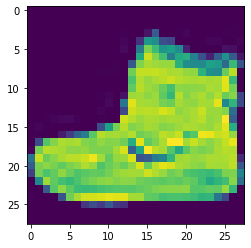

In [53]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar